In [59]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [60]:
df = pd.read_csv(r'E:\Python\EDA\Diwali_Sales_Analysis\Diwali.csv', encoding = 'unicode_escape')

In [61]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [62]:
df.tail()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN
11250,1002744,Brumley,P00281742,F,18-25,19,0,Maharashtra,Western,Healthcare,Office,3,188.0,NaN,NaN


In [63]:
df.shape

(11251, 15)

In [64]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [65]:
df.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
Status              float64
unnamed1            float64
dtype: object

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [67]:
df.isna().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [68]:
df.duplicated().sum()

np.int64(8)

In [69]:
df.drop(['User_ID','Status', 'unnamed1'], axis = 1, inplace = True)

In [70]:
df.head()

,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [71]:
df['Amount'].fillna(df['Amount'].mean(), inplace = True)

In [72]:
df.drop_duplicates(inplace=True)

In [73]:
df['Age Group'].replace({'0-17': 'Young', '18-25' : 'Adult', '26-35': 'Adult', '36-45':'Middle_Age', '46-50': 'Middle_Age', '51-55':'Middle_Age', '55+': 'Senior'}, inplace=True)

In [74]:
df['Age Group'].unique()

array(['Adult', 'Young', 'Senior', 'Middle_Age'], dtype=object)

In [75]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [76]:
df['Gender'].replace({'F':'Female','M':'Male'},inplace=True)

In [77]:
df.describe(include=['object']).T

,count,unique,top,freq
Cust_name,11243,1250,Vishakha,42
Product_ID,11243,2351,P00265242,53
Gender,11243,2,Female,7838
Age Group,11243,4,Adult,6416
State,11243,16,Uttar Pradesh,1944
Zone,11243,5,Central,4294
Occupation,11243,15,IT Sector,1586
Product_Category,11243,18,Clothing & Apparel,2653


In [78]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,11243.0,35.422841,12.756369,12.0,27.0,33.0,43.0,92.0
Marital_Status,11243.0,0.420261,0.493623,0.0,0.0,0.0,1.0,1.0
Orders,11243.0,2.488749,1.114960,1.0,1.0,2.0,3.0,4.0
Amount,11243.0,9454.084476,5218.941128,188.0,5444.0,8111.0,12672.0,23952.0


In [79]:
cat_col = df.select_dtypes(include = 'object').columns
num_col = df.select_dtypes(include=np.number).columns.tolist()
print(num_col)
print(cat_col)

['Age', 'Marital_Status', 'Orders', 'Amount']
Index(['Cust_name', 'Product_ID', 'Gender', 'Age Group', 'State', 'Zone',
       'Occupation', 'Product_Category'],
      dtype='object')


Age


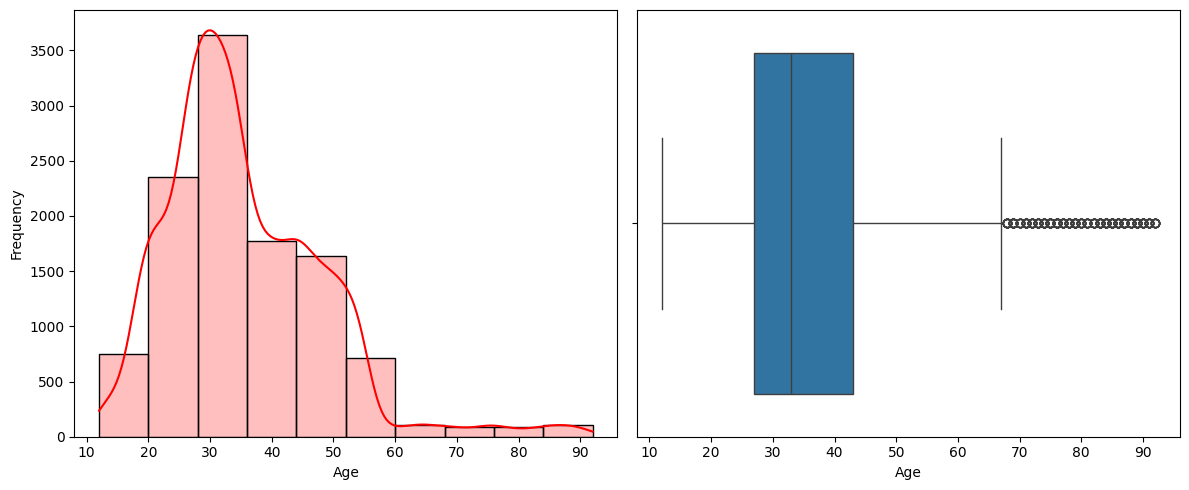

Marital_Status


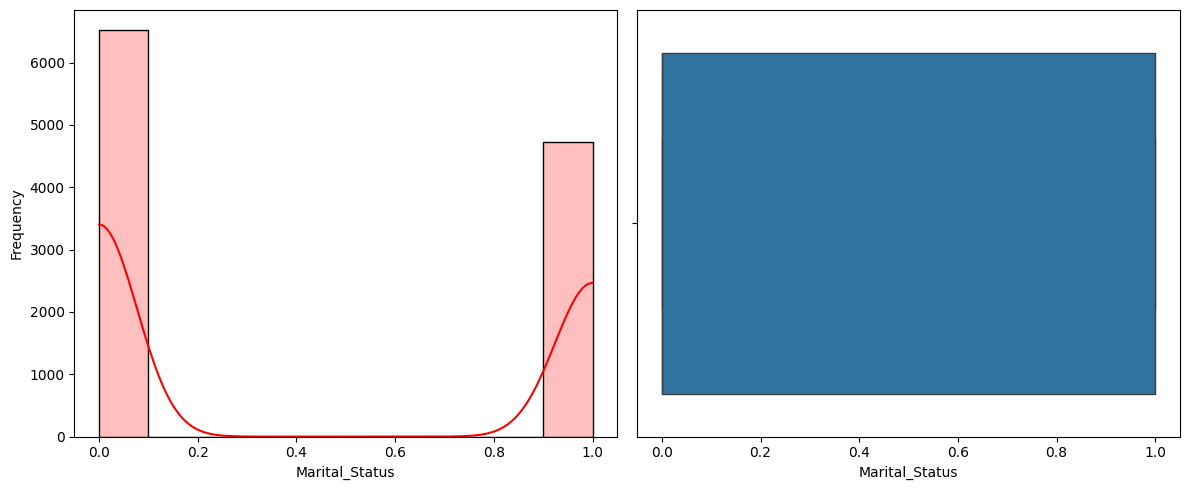

Orders


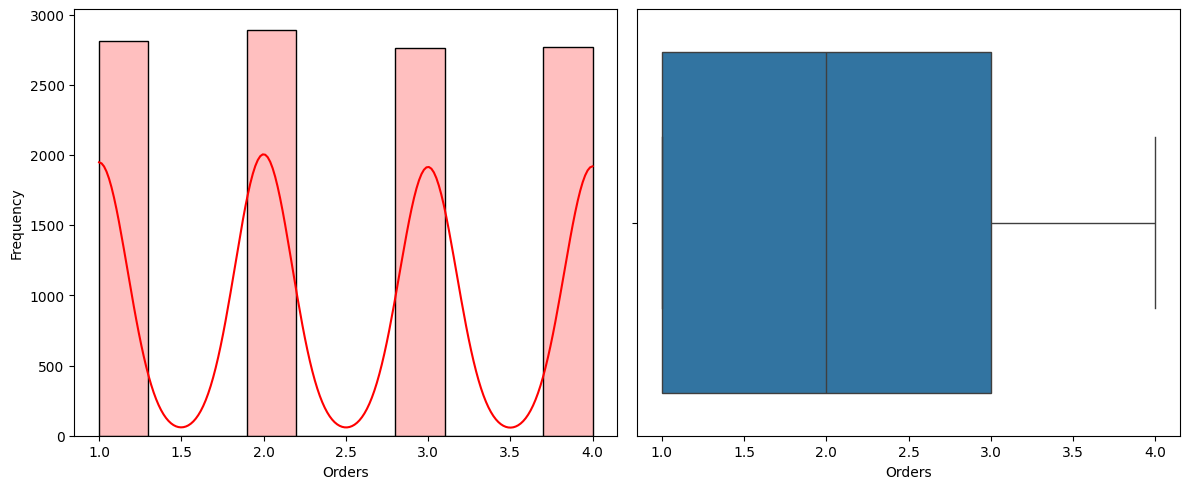

Amount


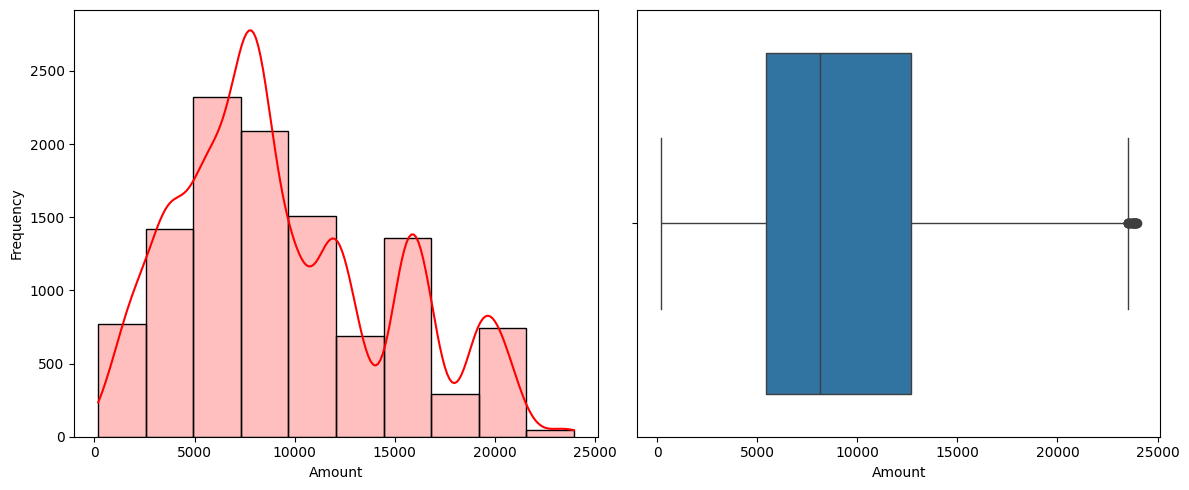

In [80]:
for i in num_col:
    print(i)

    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.histplot(x=df[i], bins =10, edgecolor = 'black', kde = True, alpha = 0.25, color='Red')
    
    plt.ylabel('Frequency')

    plt.subplot(1,2,2)
    sns.boxplot(x = df[i])

    plt.tight_layout()
    plt.show()


Cust_name


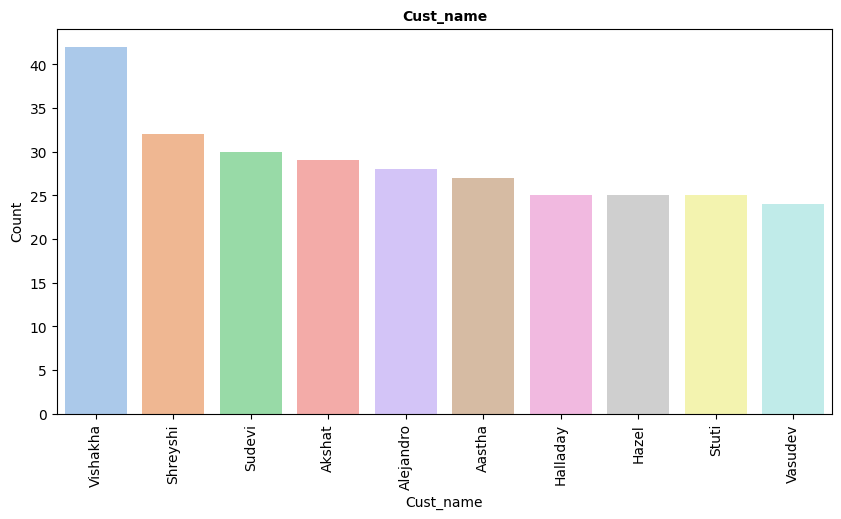

Product_ID


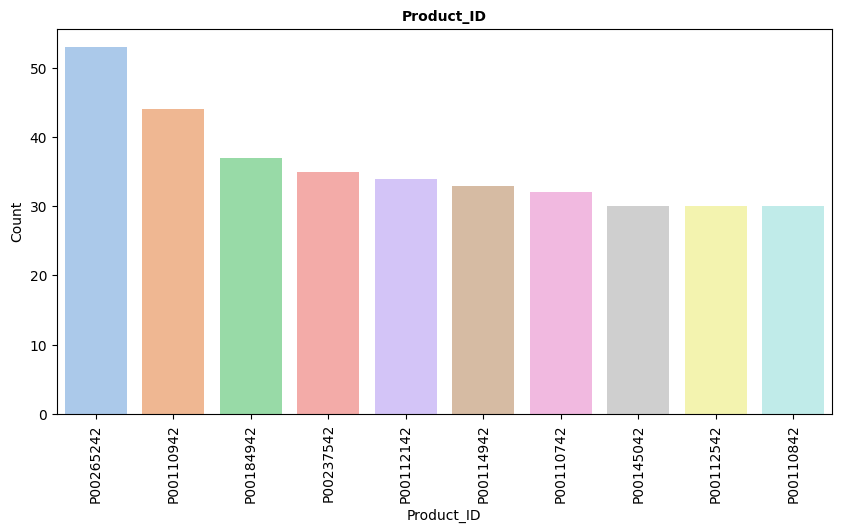

Gender


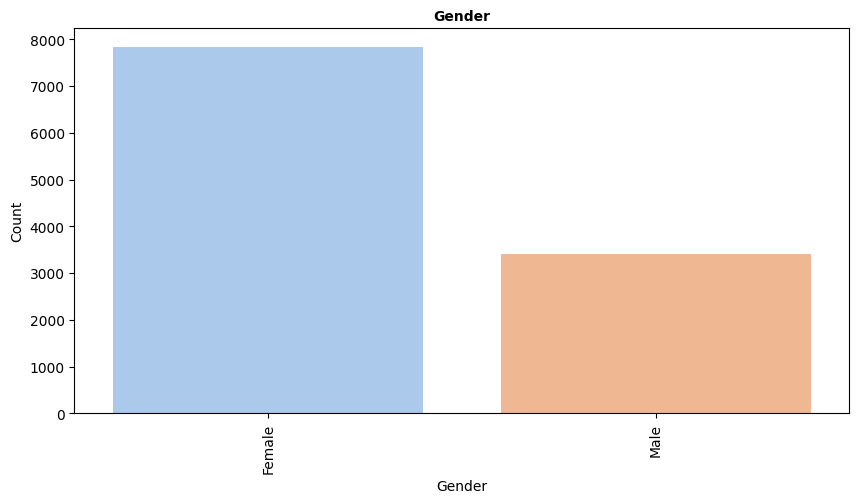

Age Group


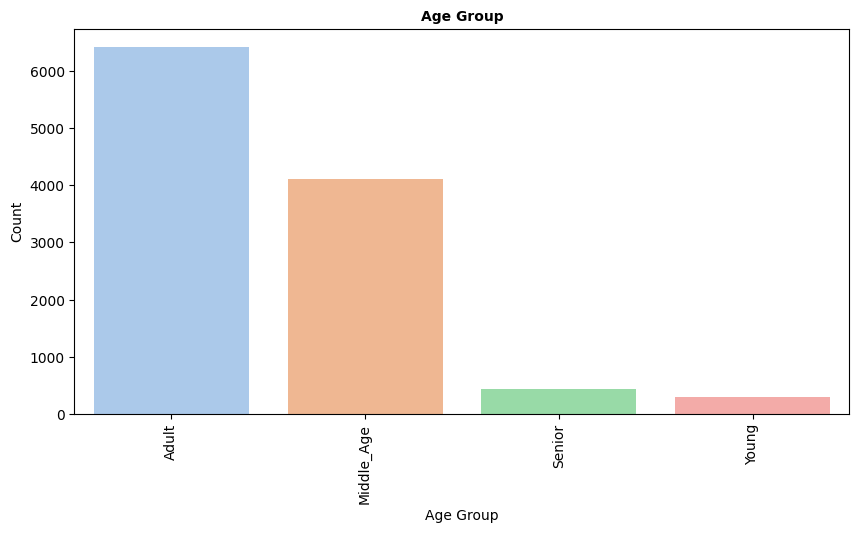

State


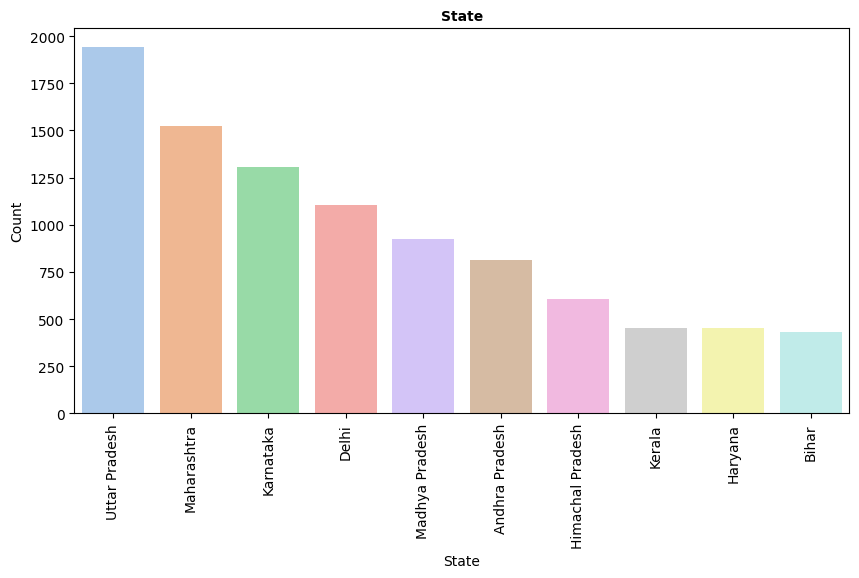

Zone


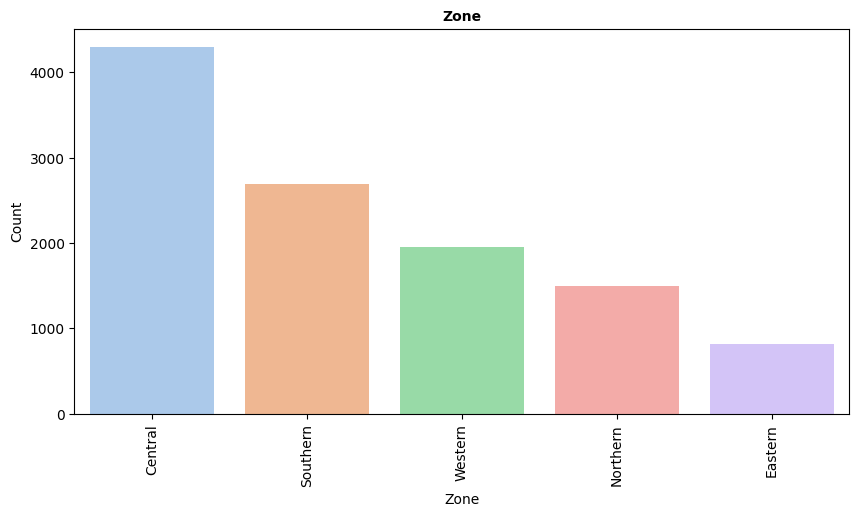

Occupation


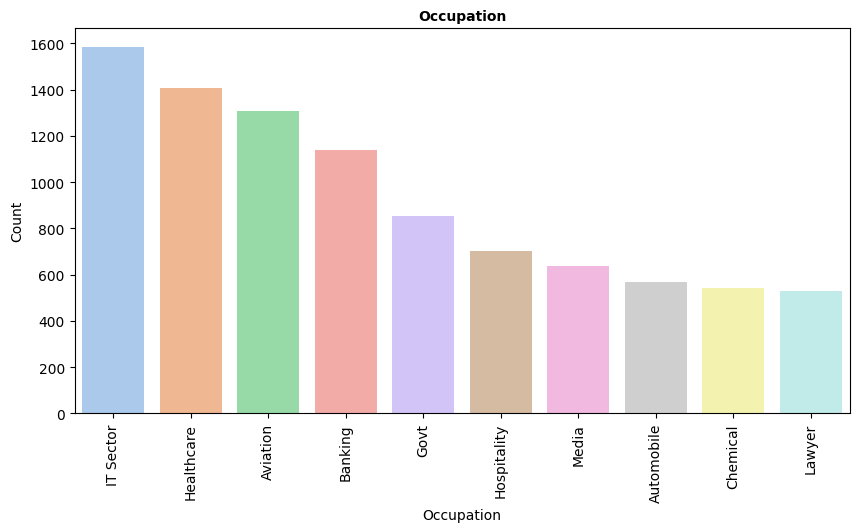

Product_Category


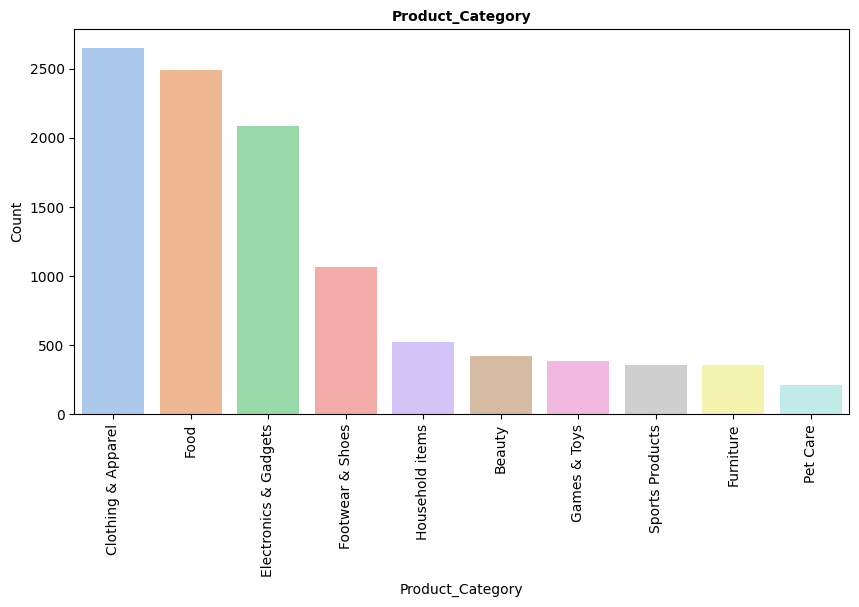

In [81]:
for i in cat_col:
    print(i)

    plt.figure(figsize=(10,5))
    sns.countplot(x = i, data =df, order= df[i].value_counts().head(10).index, palette= 'pastel')
    plt.xticks(rotation = 90)
    plt.title(i, fontsize =10, fontweight = 'bold')
    plt.ylabel('Count')
    plt.show()

In [82]:
df['Product_Category'].value_counts()

Product_Category
Clothing & Apparel       2653
Food                     2493
Electronics & Gadgets    2082
Footwear & Shoes         1064
Household items           520
Beauty                    422
Games & Toys              386
Sports Products           356
Furniture                 353
Pet Care                  212
Office                    113
Stationery                112
Books                     103
Auto                       99
Decor                      96
Veterinary                 81
Tupperware                 72
Hand & Power Tools         26
Name: count, dtype: int64

In [83]:
df['Product_ID'].value_counts().head(10)

Product_ID
P00265242    53
P00110942    44
P00184942    37
P00237542    35
P00112142    34
P00114942    33
P00110742    32
P00145042    30
P00112542    30
P00110842    30
Name: count, dtype: int64

In [84]:
df['Product_ID'].value_counts().tail(10)

Product_ID
P00249042    1
P00230642    1
P00315042    1
P00223442    1
P00033442    1
P00326042    1
P00255342    1
P00347942    1
P00273642    1
P00035742    1
Name: count, dtype: int64

In [85]:
a = df['Product_ID'].value_counts().reset_index()
a

,Product_ID,count
0,P00265242,53
1,P00110942,44
2,P00184942,37
3,P00237542,35
4,P00112142,34
...,...,...
2346,P00326042,1
2347,P00255342,1
2348,P00347942,1
2349,P00273642,1


In [86]:
a[a['count']==1].count()

Product_ID    630
count         630
dtype: int64

In [87]:
total_orders = df.groupby('Product_ID')['Orders'].sum()
total_orders.sort_values(ascending =False).head(10)

Product_ID
P00265242    127
P00110942    116
P00237542     91
P00184942     82
P00114942     79
P00025442     79
P00117942     76
P00145042     76
P00044442     75
P00110842     74
Name: Orders, dtype: int64

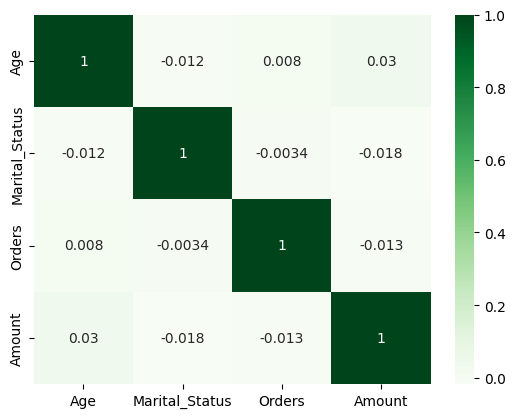

In [88]:
corr = df[num_col].corr()

sns.heatmap(corr, cmap="Greens", annot = True)
plt.show()

In [89]:
zone_orders = df.groupby('Zone')['Orders'].sum().sort_values(ascending =False)
state_orders = df.groupby('State')['Orders'].sum().sort_values(ascending =False).head()
produt_category_orders = df.groupby('Product_Category')['Orders'].sum().sort_values(ascending =False).head()
Product_ID_orders = df.groupby('Product_ID')['Orders'].sum().sort_values(ascending =False).head()

In [90]:
Product_ID_orders

Product_ID
P00265242    127
P00110942    116
P00237542     91
P00184942     82
P00114942     79
Name: Orders, dtype: int64

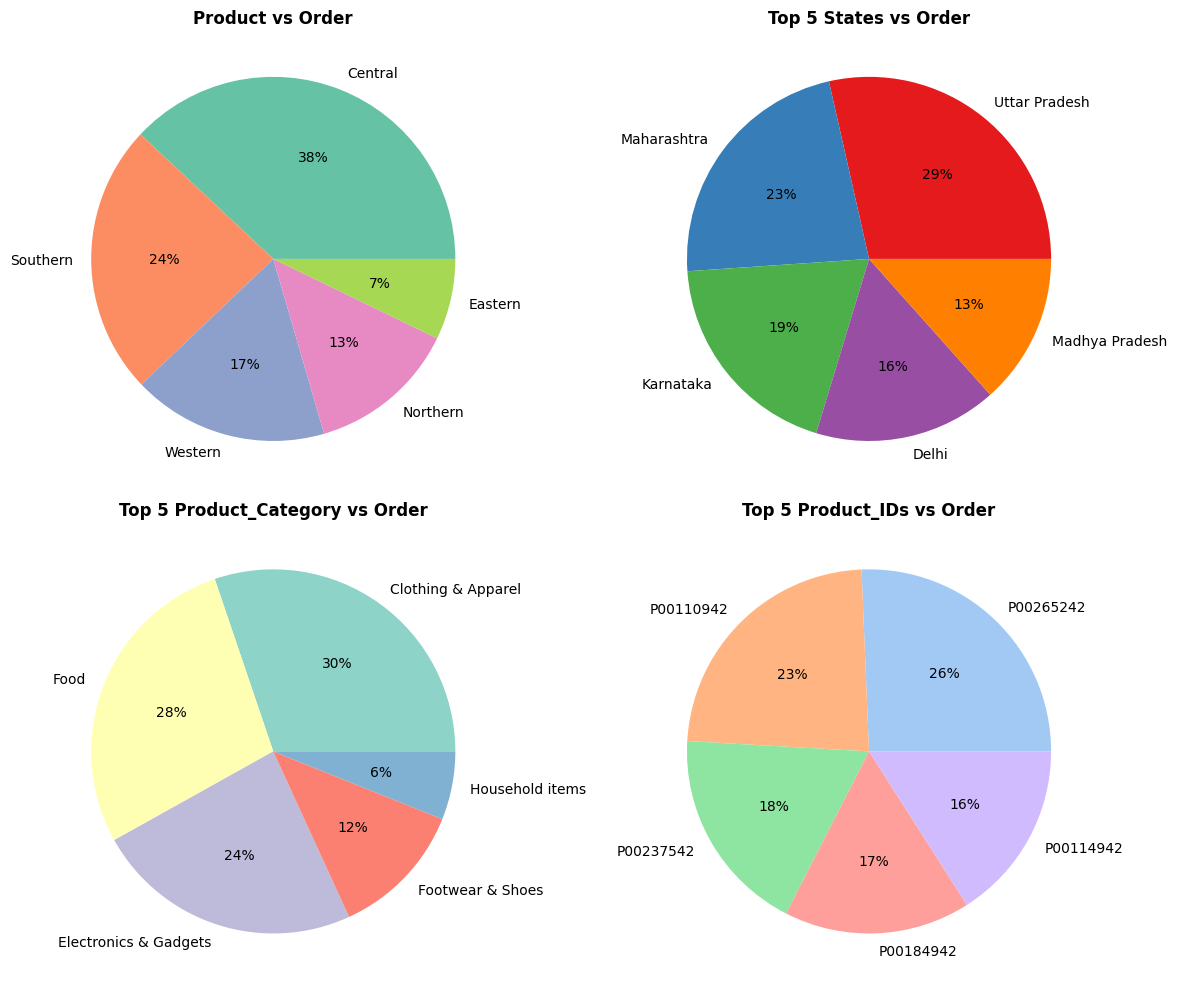

In [91]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plt.pie(zone_orders,labels = zone_orders.index, autopct ='%1.f%%', colors = sns.color_palette('Set2'))
plt.title("Product vs Order", fontweight= 'bold')
        
plt.subplot(2,2,2)
plt.pie(state_orders, labels = state_orders.index, autopct ='%1.f%%', colors = sns.color_palette('Set1'))
plt.title("Top 5 States vs Order", fontweight= 'bold')

plt.subplot(2,2,3)
plt.pie(produt_category_orders, labels = produt_category_orders.index, autopct ='%1.f%%', colors = sns.color_palette('Set3'))
plt.title("Top 5 Product_Category vs Order",fontweight= 'bold')
        
plt.subplot(2,2,4)
plt.pie(Product_ID_orders, labels = Product_ID_orders.index, autopct ='%1.f%%', colors = sns.color_palette('pastel'))
plt.title("Top 5 Product_IDs vs Order", fontweight= 'bold')

plt.tight_layout()
plt.show()

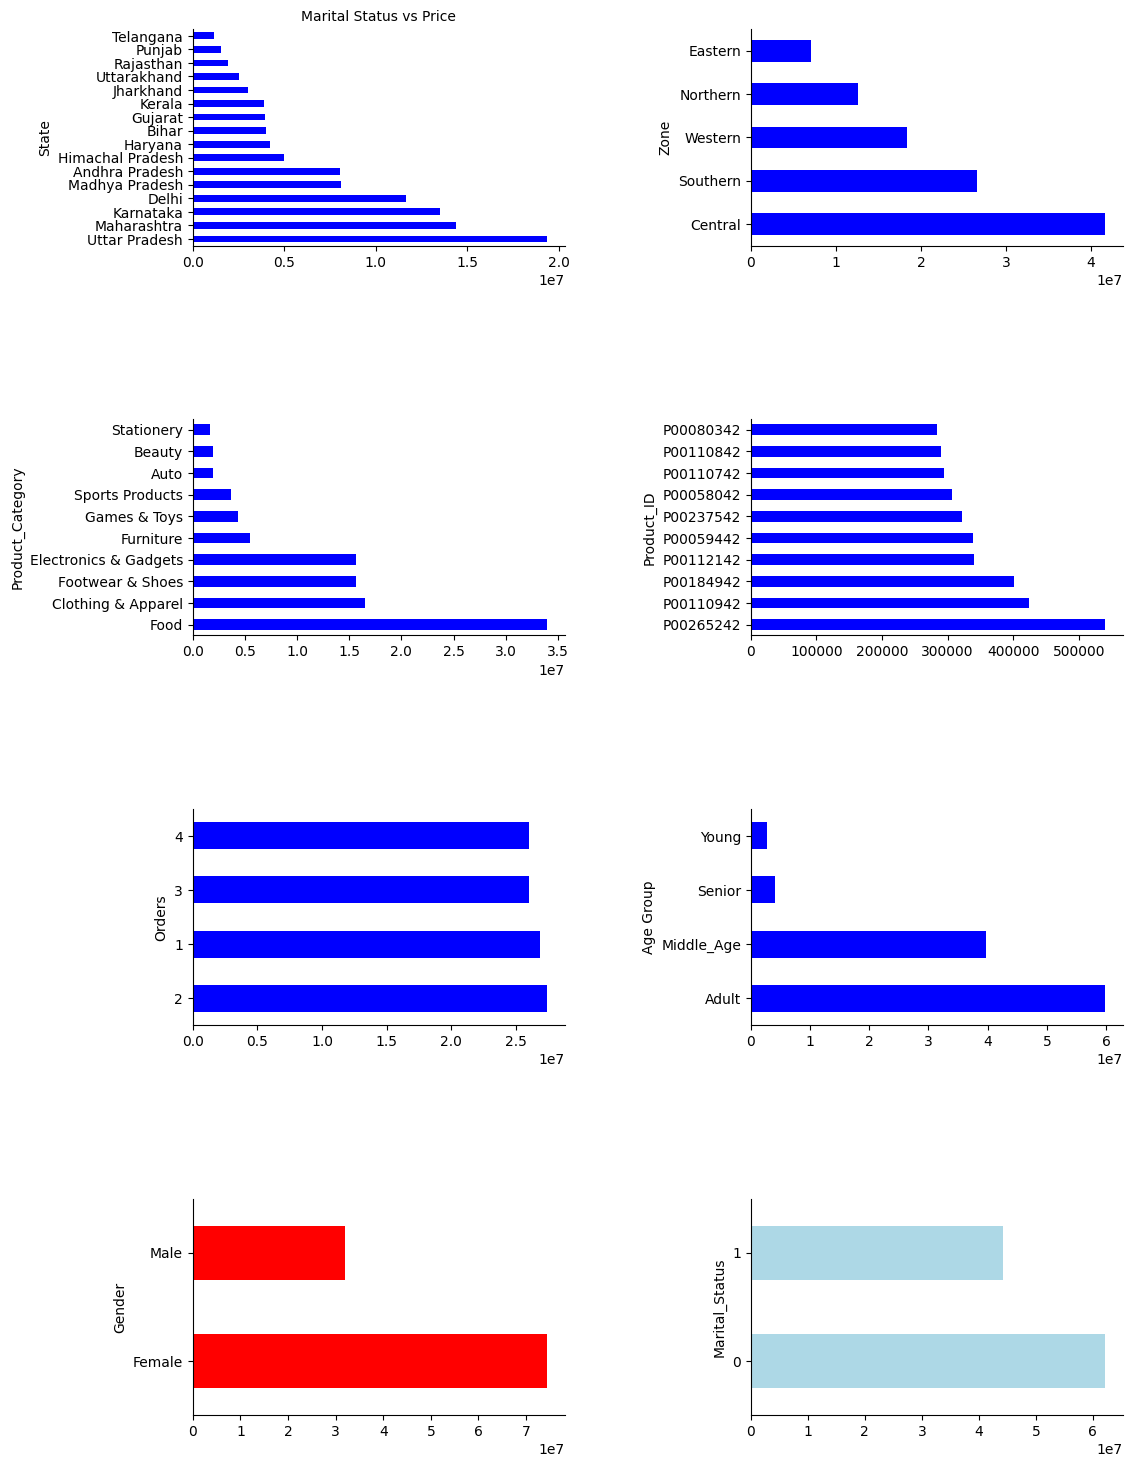

In [92]:
fig, axarr = plt.subplots(4,2, figsize=(12,18))

df.groupby('State')['Amount'].sum().sort_values(ascending=False).plot.barh(ax=axarr[0][0], fontsize=10, color='blue')
axarr[0][0].set_title('Location vs Price', fontsize =10)

df.groupby('Zone')['Amount'].sum().sort_values(ascending=False).plot.barh(ax=axarr[0][1], fontsize=10, color='blue')
axarr[0][0].set_title('Zone vs Price', fontsize =10)

df.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False).head(10).plot.barh(ax=axarr[1][0], fontsize=10, color='blue')
axarr[0][0].set_title('Product_Category vs Price', fontsize =10)

df.groupby('Product_ID')['Amount'].sum().sort_values(ascending=False).head(10).plot.barh(ax=axarr[1][1], fontsize=10, color='blue')
axarr[0][0].set_title('Product_ID vs Price', fontsize =10)

df.groupby('Orders')['Amount'].sum().sort_values(ascending=False).plot.barh(ax=axarr[2][0], fontsize=10, color='blue')
axarr[0][0].set_title('Orders vs Price', fontsize =10)

df.groupby('Age Group')['Amount'].sum().sort_values(ascending=False).plot.barh(ax=axarr[2][1], fontsize=10, color='blue')
axarr[0][0].set_title('Age Group vs Price', fontsize =10)

df.groupby('Gender')['Amount'].sum().sort_values(ascending=False).plot.barh(ax=axarr[3][0], fontsize=10, color='red')
axarr[0][0].set_title('Gender vs Price', fontsize =10)

df.groupby('Marital_Status')['Amount'].sum().sort_values(ascending=False).plot.barh(ax=axarr[3][1], fontsize=10, color='lightblue')
axarr[0][0].set_title('Marital Status vs Price', fontsize =10)

plt.subplots_adjust(hspace=0.8)
plt.subplots_adjust(wspace=.5)
sns.despine()
#above 3 lines same as plt.tight_layout()
plt.show()

In [94]:
#search = ('P00265242')
df[df['Product_ID'].str.contains('P00265242')][['Product_Category','Cust_name']]

,Product_Category,Cust_name
62,Stationery,Bruce
208,Furniture,Murray
349,Footwear & Shoes,Ann
591,Food,Craig
812,Food,Jeremy
963,Food,Dipali
1309,Footwear & Shoes,Akshata
1347,Footwear & Shoes,Hughes
1561,Games & Toys,Steven
1630,Food,Cortes
